<a href="https://colab.research.google.com/github/AvniKal/ExpenditurePredictionModel_ak/blob/master/maventic_expenditurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("MAV_Financial Planning Expenditure.csv")

In [ ]:
df.head()

,Unnamed: 0,Version,Plan,Plan.1,Plan.2,Plan.3,Plan.4,Plan.5,Plan.6,Plan.7,Plan.8,Plan.9,Plan.10,Plan.11
0,NaN,Financial Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Cost Center,G/L Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mav CC 1,COGS,3417559,3452081,3273951,3498477,3285378,3348332,3493332,3467064,3414238,3179477,3167538,3468856
3,Mav CC 1,Cost of Goods Sold,2590562,2579543,2478132,2583540,2421002,2452330,2766273,2671452,2489957,2381048,2375814,2553637
4,Mav CC 1,Gross Profit Diff,416236,391316,393452,439854,432715,390758,474435,455189,449424,382767,391840,453712


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  497 non-null    object
 1   Version     498 non-null    object
 2   Plan        497 non-null    object
 3   Plan.1      497 non-null    object
 4   Plan.2      497 non-null    object
 5   Plan.3      497 non-null    object
 6   Plan.4      497 non-null    object
 7   Plan.5      497 non-null    object
 8   Plan.6      497 non-null    object
 9   Plan.7      497 non-null    object
 10  Plan.8      497 non-null    object
 11  Plan.9      497 non-null    object
 12  Plan.10     497 non-null    object
 13  Plan.11     497 non-null    object
dtypes: object(14)
memory usage: 54.6+ KB


In [ ]:
df=df.drop([0,1])

In [ ]:
df.head()

,Unnamed: 0,Version,Plan,Plan.1,Plan.2,Plan.3,Plan.4,Plan.5,Plan.6,Plan.7,Plan.8,Plan.9,Plan.10,Plan.11
2,Mav CC 1,COGS,3417559,3452081,3273951,3498477,3285378,3348332,3493332,3467064,3414238,3179477,3167538,3468856
3,Mav CC 1,Cost of Goods Sold,2590562,2579543,2478132,2583540,2421002,2452330,2766273,2671452,2489957,2381048,2375814,2553637
4,Mav CC 1,Gross Profit Diff,416236,391316,393452,439854,432715,390758,474435,455189,449424,382767,391840,453712
5,Mav CC 1,Cost of Goods Sold,443876,399140,417068,388938,372247,395728,467022,450963,462460,409550,370624,417969
6,Mav CC 1,Price Dif - Trd Art,460190,478531,363483,472349,377529,479822,443070,411338,376129,362474,365616,359646


In [ ]:
df.columns = ['Cost_Center', 'Account', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# We’ll use this list to pick only these columns from the DataFrame.
df[month_cols] = df[month_cols].apply(pd.to_numeric, errors='coerce')
# pd.to_numeric() tries to convert values to numbers (integers or floats).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 2 to 497
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost_Center  496 non-null    object 
 1   Account      496 non-null    object 
 2   Jan          496 non-null    float64
 3   Feb          496 non-null    float64
 4   Mar          496 non-null    float64
 5   Apr          496 non-null    float64
 6   May          496 non-null    float64
 7   Jun          496 non-null    float64
 8   Jul          496 non-null    float64
 9   Aug          496 non-null    float64
 10  Sep          496 non-null    float64
 11  Oct          496 non-null    float64
 12  Nov          496 non-null    float64
 13  Dec          496 non-null    float64
dtypes: float64(12), object(2)
memory usage: 54.4+ KB


In [ ]:
df.head()

,Cost_Center,Account,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,Mav CC 1,COGS,3417559.0,3452081.0,3273951.0,3498477.0,3285378.0,3348332.0,3493332.0,3467064.0,3414238.0,3179477.0,3167538.0,3468856.0
3,Mav CC 1,Cost of Goods Sold,2590562.0,2579543.0,2478132.0,2583540.0,2421002.0,2452330.0,2766273.0,2671452.0,2489957.0,2381048.0,2375814.0,2553637.0
4,Mav CC 1,Gross Profit Diff,416236.0,391316.0,393452.0,439854.0,432715.0,390758.0,474435.0,455189.0,449424.0,382767.0,391840.0,453712.0
5,Mav CC 1,Cost of Goods Sold,443876.0,399140.0,417068.0,388938.0,372247.0,395728.0,467022.0,450963.0,462460.0,409550.0,370624.0,417969.0
6,Mav CC 1,Price Dif - Trd Art,460190.0,478531.0,363483.0,472349.0,377529.0,479822.0,443070.0,411338.0,376129.0,362474.0,365616.0,359646.0


# Creating time series data-frame

In [ ]:
#create time series

# monthly expenditure
monthly_totals=df[month_cols].sum(axis=0)

# create an index date
date_index=pd.date_range('2023-01',periods=12,freq='MS')
ts=pd.Series(monthly_totals.values,index=date_index,name="Expenditure")

In [ ]:
ts.head()

,Expenditure
2023-01-01,4.256935e+08
2023-02-01,4.431789e+08
2023-03-01,4.427404e+08
2023-04-01,4.418387e+08
2023-05-01,4.508796e+08


In [ ]:
monthly_totals.head()

,0
Jan,4.256935e+08
Feb,4.431789e+08
Mar,4.427404e+08
Apr,4.418387e+08
May,4.508796e+08


In [ ]:
date_index=pd.date_range('2023-01',periods=12,freq='MS')

In [ ]:
date_index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')

ARIMA models need the data as a continuous time-indexed series so they can understand the order and spacing of observations.
Without a proper DatetimeIndex, the model wouldn’t know which points are sequential months.
ARIMA works best when your index is a proper DatetimeIndex

<Axes: >

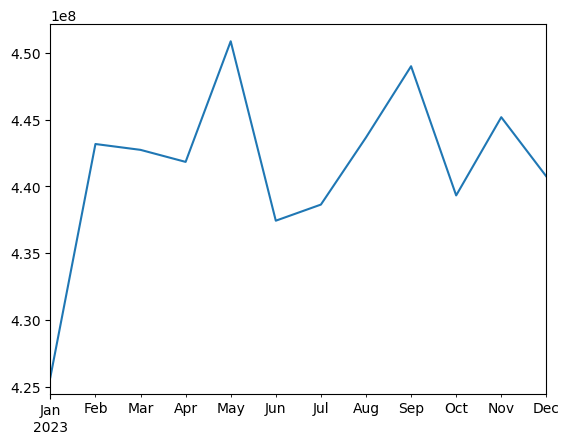

In [ ]:
ts.plot()

# stationary/non-stationary (dickey-fuller test)

In [ ]:
# check for stationary
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF-statistics:{}',format(result[0]))
    print('p-value:{}',format(result[1]))
    if result[1]<=0.05:
        print("result is stationary")
    else:
        print("result is non-stationary")


In [ ]:
adf_test(ts)

ADF-statistics:{} -2.661699506056419
p-value:{} 0.08090363123134042
result is non-stationary


# Differencing

In [ ]:
# differencing
ts_df=pd.DataFrame(ts)
ts_df['1st diff']=ts_df['Expenditure'].diff(1)
ts_df.dropna(inplace=True)
adf_test(ts_df['1st diff'])

ADF-statistics:{} -1.9081159831740244
p-value:{} 0.32825278146061754
result is non-stationary


In [ ]:
ts_df['2nd diff']=ts_df['Expenditure'].diff(2)
ts_df.dropna(inplace=True)
adf_test(ts_df['2nd diff'])

ADF-statistics:{} -5.753389838247186
p-value:{} 5.895303646591682e-07
result is stationary


In [ ]:
ts_df

,Expenditure,1st diff,2nd diff
2023-04-01,4.418387e+08,-901682.78,-1340269.09
2023-05-01,4.508796e+08,9040953.58,8139270.80
2023-06-01,4.374303e+08,-13449306.80,-4408353.22
2023-07-01,4.386382e+08,1207901.97,-12241404.83
2023-08-01,4.436681e+08,5029862.03,6237764.00
2023-09-01,4.490102e+08,5342085.63,10371947.66
2023-10-01,4.393252e+08,-9684967.57,-4342881.94
2023-11-01,4.451890e+08,5863774.22,-3821193.35
2023-12-01,4.407478e+08,-4441219.74,1422554.48


# Autocorrealtion / Partial autocorrelation plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

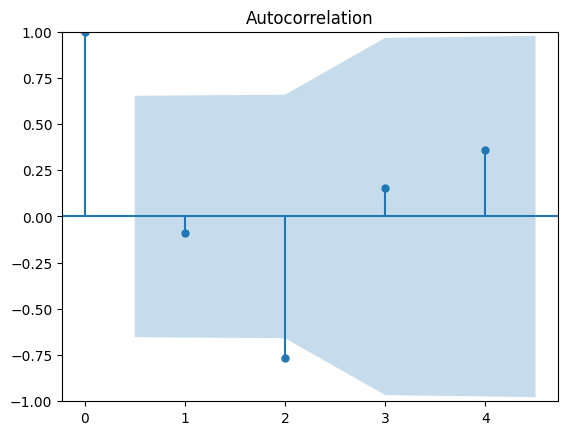

In [ ]:
acf=plot_acf(ts_df['2nd diff'])
# used to implement moving average
# used to find q value

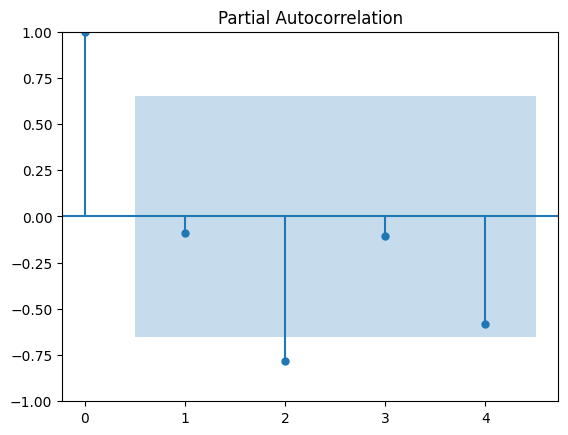

In [ ]:
result=plot_pacf(ts_df['2nd diff'])
# pacf is used to implement auto-regression
# used to find p value

# training/test data
Also, train_test_split is not the right method for ARIMA/time series, because it randomly splits the data. Time series must be split chronologically (past → future).

In [ ]:
train_size = int(len(ts_df) * 0.8)
train= ts_df.iloc[:train_size]
test=ts_df.iloc[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 7
Test size: 2


In [ ]:
train

,Expenditure,1st diff,2nd diff
2023-04-01,4.418387e+08,-901682.78,-1340269.09
2023-05-01,4.508796e+08,9040953.58,8139270.80
2023-06-01,4.374303e+08,-13449306.80,-4408353.22
2023-07-01,4.386382e+08,1207901.97,-12241404.83
2023-08-01,4.436681e+08,5029862.03,6237764.00
2023-09-01,4.490102e+08,5342085.63,10371947.66
2023-10-01,4.393252e+08,-9684967.57,-4342881.94


In [ ]:
test

,Expenditure,1st diff,2nd diff
2023-11-01,4.451890e+08,5863774.22,-3821193.35
2023-12-01,4.407478e+08,-4441219.74,1422554.48


# FIT ARIMA MODEL



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Expenditure'], order=(2,2,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
start_test=test.index[0]
end_test=test.index[-1]
pred=model_fit.predict(start=start_test,end=end_test)
residual=test['Expenditure']-pred

In [ ]:
residual

,0
2023-11-01,1.548041e+07
2023-12-01,1.769569e+07


In [ ]:
pred

,predicted_mean
2023-11-01,4.297086e+08
2023-12-01,4.230521e+08


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Expenditure   No. Observations:                    7
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 -86.472
Date:                Tue, 19 Aug 2025   AIC                            182.943
Time:                        04:39:07   BIC                            180.990
Sample:                    04-01-2023   HQIC                           177.702
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2138      2.013      0.106      0.915      -3.731       4.158
ar.L2         -0.4457      1.050     -0.425      0.671      -2.503       1.612
ma.L1         -0.2089      2.199     -0.095      0.924      -4.520       4.102
ma.L2          0.4041      1.158      0.349      0.727      -1.866       2.674
sigma2      1.273e+14   5.28e-15   2.41e+28      0.000    1.27e+14    1.27e+14
===================================================================================
Ljung-Box (L1) (Q):                   4.58   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.03   Prob(JB):                         0.75
Heteroskedasticity (H):              16.84   Skew:                            -0.10
Prob(H) (two-sided):                  0.11   Kurtosis:                         1.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+45. Standard errors may be unstable.
"""

<Axes: ylabel='Density'>

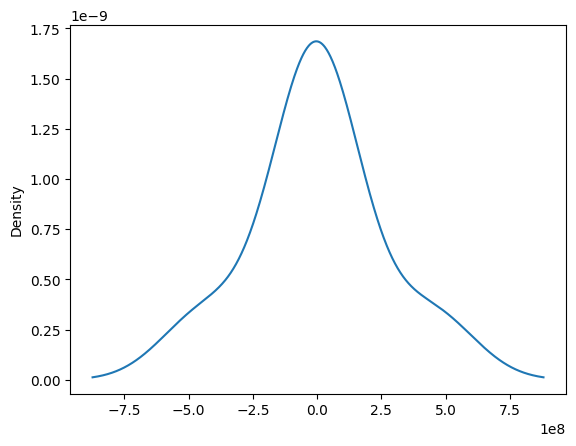

In [ ]:
model_fit.resid.plot(kind='kde')

In [ ]:
test["predicted arima"]=pred

/tmp/ipython-input-906901114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted arima"]=pred


<Axes: >

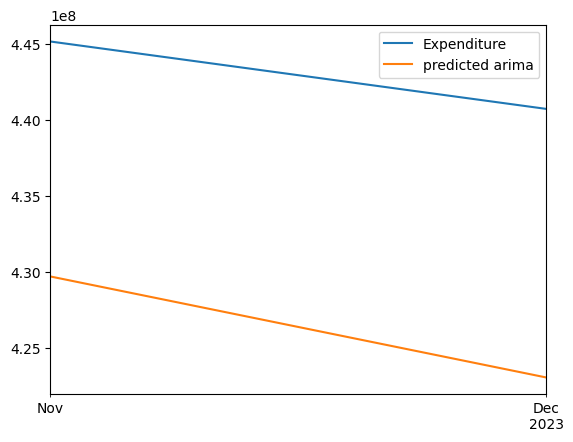

In [ ]:
test[['Expenditure','predicted arima']].plot()

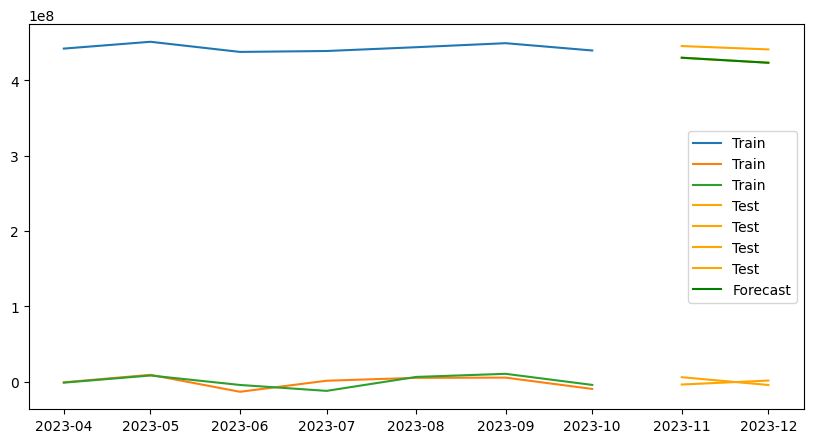

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="orange")
plt.plot(forecast, label="Forecast", color="green")
plt.legend()
plt.show()